# GPT4

**Note:**
<div class="alert alert-block alert-info">

1. This notebook presents the output of GPT4 with little to no human assistance. Intervention is only introduced to ensure code is able to run and proceed to the next stage.
2. Boxes highlighted in yellow indicates warning. This indicates the step where we think the LLM produces a somewhat problematic output, or misses out on important thought process. Some minor modifications may be made to the LLM output to ensure the code proceeds to run.

**Prompt 1:**

<div class="alert alert-block alert-info">
 I want you to act like a Data Scientist and help me build a classification model for a hotel booking dataset. I will share the first 20 rows of data with you.

Copy paste first 20 rows of data (Claude and Gemini), for GPT (upload dataset)

Before we proceed, let me share the metadata for the dataset.

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below. The goal is to build a classification model with the target variable being `booking_status`.

</div>

  #### Train data:
| No. | Features | Description |
| :-------- | :-------- | :-------- |
| 1. | Booking_ID | Unique identifier of each booking |
| 2. | no_of_adults | Number of adults |
| 3. | no_of_children | Number of Children |
| 4. | no_of_weekend_nights | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel |
| 5. | no_of_week_nights | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel |
| 6. | type_of_meal_plan | Type of meal plan booked by the customer |
| 7. | required_car_parking_space | Does the customer require a car parking space? (0 - No, 1- Yes) |
| 8. | room_type_reserved | Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels. |
| 9. | lead_time | Number of days between the date of booking and the arrival date |
| 10. | arrival_year | Year of arrival date |
| 11. | arrival_month | Month of arrival date |
| 12. | arrival_date | Date of the month |
| 13. | market_segment_type | Market segment designation |
| 14. | repeated_guest | Is the customer a repeated guest? (0 - No, 1- Yes) |
| 15. | no_of_previous_cancellations | Number of previous bookings that were canceled by the customer prior to the current bookinge |
| 16. | no_of_previous_bookings_not_canceled | Number of previous bookings not canceled by the customer prior to the current booking |
| 17. | avg_price_per_room | Average price per day of the reservation; prices of the rooms are dynamic. (in euros) |
| 18. | no_of_special_requests | Total number of special requests made by the customer (e.g. high floor, view from the room, etc) |
| 19. | booking_status | Flag indicating if the booking was canceled or not |

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../../data/raw/hotel_reservations.csv')

# Display the first few rows of the dataframe
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Added Code below to do data quality check

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Check for missing values
missing_values = df.isnull().sum()

# Convert categorical variables to numeric using Label Encoding
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
label_encoders = {}
for col in categorical_cols:
    if col != 'booking_status':  # Exclude the target variable from encoding
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Splitting the dataset into features (X) and target variable (y)
X = df.drop('booking_status', axis=1)
y = df['booking_status']

# Encoding target variable
y = LabelEncoder().fit_transform(y)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Displaying the missing values if any, and the shapes of the training and testing sets
missing_values, X_train.shape, X_test.shape

(Booking_ID                              0
 no_of_adults                            0
 no_of_children                          0
 no_of_weekend_nights                    0
 no_of_week_nights                       0
 type_of_meal_plan                       0
 required_car_parking_space              0
 room_type_reserved                      0
 lead_time                               0
 arrival_year                            0
 arrival_month                           0
 arrival_date                            0
 market_segment_type                     0
 repeated_guest                          0
 no_of_previous_cancellations            0
 no_of_previous_bookings_not_canceled    0
 avg_price_per_room                      0
 no_of_special_requests                  0
 booking_status                          0
 dtype: int64,
 (25392, 18),
 (10883, 18))

# Predictive Analysis

In [3]:
data = df.copy()

### Added codes for following 2 cells to ensure date conversion works.

In [4]:
# Correction Code

data['arrival_year'] = data['arrival_year'].astype(str)
data['arrival_date'] = data['arrival_date'].astype(str)
data['arrival_month'] = data['arrival_month'].astype(str)

In [5]:
# Correction Code

# Since we can't directly print or check the unique values in 'arrival_month', let's proceed with the conversion assuming it's correct
# Try creating the 'full_date' column again with a method that ensures string conversion
try:
    data['full_date'] = pd.to_datetime(data['arrival_year'] + '-' + data['arrival_month'] + '-' + data['arrival_date'], errors='coerce')
except Exception as e:
    error_message = str(e)

error_message if 'error_message' in locals() else "Conversion Attempted"

'Conversion Attempted'

**Prompt 2:**
<div class="alert alert-block alert-info">

There are faulty dates 29 February 2018 in the dataset. Help me drop these rows.

</div>

### The code below gives error. Hence commented away.

In [6]:
# # Correction Code

# # Step 1: Convert to datetime object
# # Assuming 'arrival_month' is a string like 'January', 'February', etc., and 'arrival_date' is the day of the month
# # First, we create a full date string and then convert it to datetime

# data['full_date'] = data.apply(lambda row: pd.to_datetime(f"{row['arrival_year']}-{row['arrival_month']}-{row['arrival_date']}", errors='coerce'), axis=1)


# # Step 2: Identify rows with February 29 in non-leap years
# # A leap year is divisible by 4, but years divisible by 100 are not leap years unless they are also divisible by 400

# # This function checks if a year is a leap year
# def is_leap_year(year):
#     return (year % 4 == 0 and year % 100 != 0) or (year % 400 == 0)

# # Apply the function to identify non-leap years with February 29
# data['is_leap_year'] = data['arrival_year'].astype(int).apply(is_leap_year)
# data['is_leap_year'] = data['arrival_year'].apply(is_leap_year)
# faulty_rows = data[(data['full_date'].dt.month == 2) & (data['full_date'].dt.day == 29) & (~data['is_leap_year'])]

# # Step 3: Drop these rows
# clean_data = data.drop(faulty_rows.index)

# # Let's check the shape of the dataset before and after to confirm rows were dropped
# data.shape, clean_data.shape

**Notes:**

<div class="alert alert-warning">

Originally, the LLM tried to define a function to identify any incorrect 29 February dates in non-leap years and label them in binary data under a new column `is_leap_year`. But the code could not work and produced a Type error.

</div>

**Prompt 3:**
<div class="alert alert-block alert-info">

Perform train test split on my hotel data with test size 0.2 and stratify the target.

</div>

### The below code has been added

In [7]:
# Added Code

data['arrival_year'] = data['arrival_year'].astype(int)
data['arrival_date'] = data['arrival_date'].astype(int)
data['arrival_month'] = data['arrival_month'].astype(int)

In [8]:
from sklearn.model_selection import train_test_split

# Assuming your target variable is 'booking_status'
X = data.drop('booking_status', axis=1)  # Features
y = data['booking_status']  # Target

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the shapes of the resulting splits to confirm the operation
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((29020, 19), (7255, 19), (29020,), (7255,))

In [9]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,full_date
0,0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,Not_Canceled,2017-10-02
1,1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,Not_Canceled,2018-11-06
2,2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,Canceled,2018-02-28
3,3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,Canceled,2018-05-20
4,4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,Canceled,2018-04-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,Not_Canceled,2018-08-03
36271,36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,Canceled,2018-10-17
36272,36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,Not_Canceled,2018-07-01
36273,36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,Canceled,2018-04-21


# Added code below as GPT failed to identify incorrect dates

In [10]:
# Identify rows with the faulty date
error_mask = (data['arrival_month'] == 2) & (data['arrival_date'] == 29) & (data['arrival_year'] == 2018) 

# Drop the rows with errors
data = data[~error_mask] 

# Print a message to confirm the removal
print(f"Removed {error_mask.sum()} rows with invalid dates.")

Removed 37 rows with invalid dates.


**Notes:**
<div class="alert alert-warning">

Since the earlier function given by ChatGPT does not work, the group coded the above new code cell to run and remove the invalid dates.

</div>

**Prompt 4:**
<div class="alert alert-block alert-info">

Now I would like you to start doing feature engineering on the dataset.

Recommend new feature creation as part of the feature engineering process.
`date_combined` in the following format (2017-10-02) `is_weekend_arrival`, `quarter`, etc.
`lead_time_category` (i.e. < 90, 'Within 3 months', < 180, 'Within 6 months', > 180 'Beyond 6 months'
`total_people`
`is_alone`
`Total_nights_stay`
Drop the date_combined after extraction of features from the datetime.

</div>

In [11]:
import pandas as pd

# Assuming data['arrival_month'] is a numeric month. If it's a string, you may need to map it to numeric or ensure it's in a format pandas.to_datetime can understand.

# Step 1: Correctly creating the 'date_combined' column
data['date_combined'] = pd.to_datetime(data['arrival_year'].astype(str) + '-' + data['arrival_month'].astype(str) + '-' + data['arrival_date'].astype(str))

# Now, proceed with the feature engineering:

# 2. is_weekend_arrival
data['is_weekend_arrival'] = data['date_combined'].dt.dayofweek >= 5

# 3. quarter
data['quarter'] = data['date_combined'].dt.quarter

# 4. lead_time_category
data['lead_time_category'] = pd.cut(data['lead_time'], bins=[-1, 90, 180, float('inf')], labels=['Within 3 months', 'Within 6 months', 'Beyond 6 months'])

# 5. total_people
data['total_people'] = data['no_of_adults'] + data['no_of_children']

# 6. is_alone
data['is_alone'] = (data['total_people'] == 1)

# 7. Total_nights_stay
data['Total_nights_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

# Finally, drop the 'date_combined' column if no longer needed
data.drop('date_combined', axis=1, inplace=True)

/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_16866/2873353420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['date_combined'] = pd.to_datetime(data['arrival_year'].astype(str) + '-' + data['arrival_month'].astype(str) + '-' + data['arrival_date'].astype(str))
/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_16866/2873353420.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_weekend_arrival'] = data['date_combined'].dt.dayofweek >= 5
/var/folders/zx/x3_2llcj0tqd7f

**Prompt 5:**
<div class="alert alert-block alert-info">

Please encode categorical variables on the following columns: [`type_of_meal_plan`, `room_type_reserved`, `market_segment_type`, `lead_time_category`]. Recommend and apply appropriate encoding techniques for each variable.

</div>

### Editted the code below to ensure that encoded columns do not get dropped.

In [12]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# One-hot encode the nominal variables
one_hot_encoded_data = pd.get_dummies(data[['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']], drop_first=True)

# Map for ordinal encoding of 'lead_time_category'
lead_time_category_mapping = {'Within 3 months': 1, 'Within 6 months': 2, 'Beyond 6 months': 3}

# Apply ordinal encoding manually using the mapping
data['lead_time_category_encoded'] = data['lead_time_category'].map(lead_time_category_mapping)

# Combine the one-hot encoded columns back into the original dataframe
data_combined = pd.concat([data, one_hot_encoded_data], axis=1)

# Drop the original columns to avoid redundancy
data_combined.drop(['lead_time_category'], axis=1, inplace=True)

# Let's check the first few rows to ensure the transformations
data_combined.head()

/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_16866/1622690029.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lead_time_category_encoded'] = data['lead_time_category'].map(lead_time_category_mapping)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,full_date,is_weekend_arrival,quarter,total_people,is_alone,Total_nights_stay,lead_time_category_encoded,type_of_meal_plan,room_type_reserved,market_segment_type
0,0,2,0,1,2,0,0,0,224,2017,...,2017-10-02,False,4,2,False,3,3,0,0,3
1,1,2,0,2,3,3,0,0,5,2018,...,2018-11-06,False,4,2,False,5,1,3,0,4
2,2,1,0,2,1,0,0,0,1,2018,...,2018-02-28,False,1,1,True,3,1,0,0,4
3,3,2,0,0,2,0,0,0,211,2018,...,2018-05-20,True,2,2,False,2,3,0,0,4
4,4,2,0,1,1,3,0,0,48,2018,...,2018-04-11,False,2,2,False,2,1,3,0,4


**Notes:**
<div class="alert alert-warning">

ChatGPT used OrdinalEncoder to transform `type_of_meal_plan` and `market_segment_type` with ordinal encoding, which may not be adequate in our case since it takes into assumption that there are certain ranking and hierarchy in those 2 features. Types of meal plans may be there for the purpose of wide variety of dietary conformation rather than level of quality. As for market segment types, it is hard to define the ranking between different ways of booking the hotel rooms.

</div>

**Prompt 6:**
<div class="alert alert-block alert-info">

Please perform scaling of numerical variables on the following columns: [`lead_time`, `avg_price_per_room`]. Recommend and apply appropriate scaling techniques for each variable.

</div>

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
# Assuming 'data' is your DataFrame and it includes your training data
data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(data[['lead_time', 'avg_price_per_room']])

/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_16866/1290409057.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[['lead_time', 'avg_price_per_room']] = scaler.fit_transform(data[['lead_time', 'avg_price_per_room']])


**Prompt 7:**
<div class="alert alert-block alert-info">

Help me to explode the feature space by considering feature interactions and polynomial terms. Start small by considering only feature interactions first.

</div>

In [15]:
from sklearn.preprocessing import PolynomialFeatures

# Example: Selecting a subset of numerical features for interaction terms
features_for_interaction = ['lead_time', 'total_people', 'Total_nights_stay']

# Initialize PolynomialFeatures with degree=2 for interactions and no polynomial terms
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

# Fit and transform the selected features
interaction_features = poly.fit_transform(data_combined[features_for_interaction])

# The resulting interaction_features is a NumPy array. Let's convert it into a DataFrame
interaction_feature_names = poly.get_feature_names_out(features_for_interaction)
interaction_df = pd.DataFrame(interaction_features, columns=interaction_feature_names)

# Now, let's concatenate this DataFrame with our original data (excluding the original features used for interactions)
data_expanded = pd.concat([data_combined.drop(features_for_interaction, axis=1), interaction_df], axis=1)

In [16]:
data_combined.drop(['full_date'], axis=1, inplace=True)

**Notes:**
<div class="alert alert-warning">

ChatGPT did not drop the `full_date` column before attempting to fit and train the dataset, which will cause an error later on.

</div>

In [17]:
data_combined.dtypes

Booking_ID                                 int64
no_of_adults                               int64
no_of_children                             int64
no_of_weekend_nights                       int64
no_of_week_nights                          int64
type_of_meal_plan                          int64
required_car_parking_space                 int64
room_type_reserved                         int64
lead_time                                  int64
arrival_year                               int64
arrival_month                              int64
arrival_date                               int64
market_segment_type                        int64
repeated_guest                             int64
no_of_previous_cancellations               int64
no_of_previous_bookings_not_canceled       int64
avg_price_per_room                       float64
no_of_special_requests                     int64
booking_status                            object
is_weekend_arrival                          bool
quarter             

**Prompt 8:**
<div class="alert alert-block alert-info">

Now I would like to have feature selection. Please choose to include only influential features in model building. Recommend some ways in which feature selection can be done.

</div>

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data_combined' is your preprocessed and encoded dataset and 'booking_status' is the target variable
X = data_combined.drop('booking_status', axis=1)  # Drop the target variable to get the feature set
y = data_combined['booking_status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = rf.feature_importances_

# Sort the feature importances in descending order and pair with column names
sorted_importances = sorted(zip(feature_importances, X.columns), reverse=True)

# Display the sorted feature importances
sorted_importances

[(0.20572948169374503, 'lead_time'),
 (0.1195511640397669, 'avg_price_per_room'),
 (0.10242725318003115, 'no_of_special_requests'),
 (0.08944494636228065, 'lead_time_category_encoded'),
 (0.08140332180187798, 'Booking_ID'),
 (0.0658692997924426, 'arrival_date'),
 (0.056071723580426044, 'arrival_month'),
 (0.03730662125149618, 'Total_nights_stay'),
 (0.03197985265115601, 'no_of_week_nights'),
 (0.028821273749633523, 'market_segment_type'),
 (0.02634589846656798, 'no_of_weekend_nights'),
 (0.024069984700725265, 'market_segment_type'),
 (0.02053151978712769, 'arrival_year'),
 (0.019925282354256942, 'quarter'),
 (0.013301337680306042, 'total_people'),
 (0.012308899493865938, 'is_weekend_arrival'),
 (0.010605849170873758, 'no_of_adults'),
 (0.009415222985298555, 'type_of_meal_plan'),
 (0.00876901575904637, 'room_type_reserved'),
 (0.008562600602121268, 'type_of_meal_plan'),
 (0.00848446723142878, 'room_type_reserved'),
 (0.007609710535722903, 'is_alone'),
 (0.0053858694441206965, 'required_

In [19]:
data.drop(['Booking_ID', 'full_date'], axis=1, inplace=True)
data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)

/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_16866/3569675390.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Booking_ID', 'full_date'], axis=1, inplace=True)
/var/folders/zx/x3_2llcj0tqd7f6y6p1wdbhr0000gn/T/ipykernel_16866/3569675390.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['booking_status'] = data['booking_status'].apply(lambda x: 1 if x == "Canceled" else 0)


**Notes:**
<div class="alert alert-warning">

ChatGPT did not convert the `booking_status` to 1 or 0 before performing fitting into the model which may lead to further errors. To ensure smoothness in fitting the models, it is corrected with the above code to change the y variables into 0 or 1.

</div>

**Prompt 9:** 
<div class="alert alert-block alert-info">

Can you help me to wrap all the processes above in a Pipeline and ColumnTransformer if necessary.

</div>

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Assuming 'data_combined' is your dataset ready for splitting into features and target
X = data.drop('booking_status', axis=1)
y = data['booking_status']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Lists of column names that need different preprocessing
numerical_cols = ['lead_time', 'avg_price_per_room']  # Add other numerical columns as needed
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'lead_time_category']  # Add other categorical columns as needed

# Creating the preprocessing pipelines for both numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Creating the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fitting the pipeline
pipeline.fit(X_train, y_train)

# Using the pipeline to make predictions
y_pred = pipeline.predict(X_test)

# Here you can add further steps to evaluate the model

**Notes:**
<div class="alert alert-warning">

ChatGPT earlier on did Ordinal Encoder on `type_of_meal_plan` and `market_segment_type` but now did One-hot encoding on them. This shows that ChatGPT seem to have trouble with remembering and knowing that it had chosen to use Ordinal Encoding on those features.

</div>

**Prompt 10:**
<div class="alert alert-block alert-info">

Let’s build a simple predictive model starting with a LogisticRegression / XGBoost / SVC. Evaluate the model performance by accuracy, precision, recall, f1-score, and roc-auc. Print out the classification report as well.

</div>

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Update the model in the pipeline to LogisticRegression
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined as before
    ('model', LogisticRegression(random_state=42, max_iter=1000))
])

# Fit the pipeline to the training data
pipeline_lr.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline_lr.predict(X_test)
y_pred_proba = pipeline_lr.predict_proba(X_test)[:, 1]  # Probabilities needed for ROC-AUC

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7579
Precision: 0.6888
Recall: 0.4769
F1 Score: 0.5635
ROC-AUC: 0.7885

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      4872
           1       0.69      0.48      0.56      2376

    accuracy                           0.76      7248
   macro avg       0.73      0.69      0.70      7248
weighted avg       0.75      0.76      0.74      7248



**Prompt 11:**
<div class="alert alert-block alert-info">

Let’s visualise the model performance using ConfusionMatrixDisplay, Precision Recall Curve and ROC AUC curve.

</div>

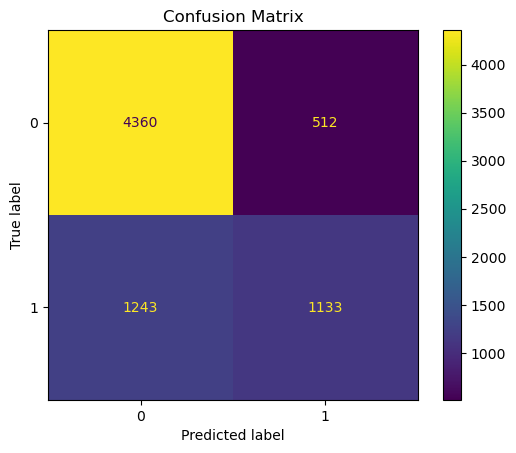

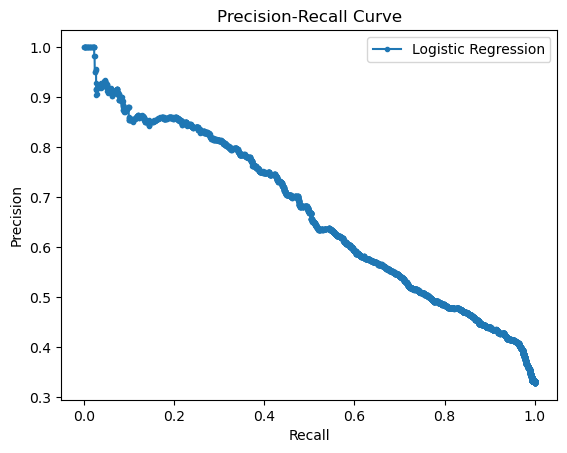

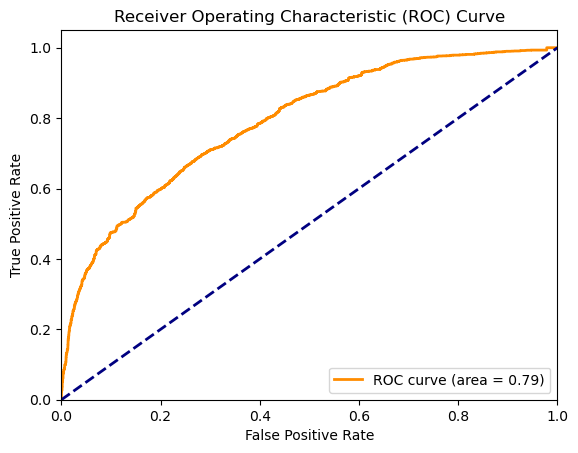

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc

# Generate Confusion Matrix Display
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix')
plt.show()

# Generate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, marker='.', label='Logistic Regression')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Generate ROC-AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**Prompt 12:**
<div class="alert alert-block alert-info">

Let’s perform hyperparameter tuning to optimise the model performance. Start small by considering only a few combinations of hyperparameters.

</div>

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined as before
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid
param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],  # 'l1', 'elasticnet' might require different solvers
    'classifier__solver': ['liblinear']  # 'saga' is also a good choice for 'l1', 'elasticnet', and 'l2'
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Optionally, evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Evaluate y_pred as before to get performance metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'classifier__C': 10, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best score: 0.7614004829251466

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.89      0.83      4872
           1       0.69      0.48      0.56      2376

    accuracy                           0.76      7248
   macro avg       0.73      0.69      0.70      7248
weighted avg       0.75      0.76      0.74      7248



**Notes:**
<div class="alert alert-warning">

It is good that ChatGPT recognises that l1 and elasticnet may require different solvers and hence did not use them in gridsearch. ChatGPT recognises that `saga` is a good choice for L1, L2 and elasticnet but did not test using `saga` in the GridsearchCV.

</div>

**Prompt 13:**
<div class="alert alert-block alert-info">

Can you also use Hyperopt to perform hyperparameter tuning?

</div>

In [24]:
from hyperopt import hp

# Define the search space for hyperparameters
space = {
    'C': hp.loguniform('C', np.log(0.01), np.log(10)),  # loguniform distribution
    'penalty': hp.choice('penalty', ['l2']),  # 'l1' and 'elasticnet' might need different solvers
}

In [25]:
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,...,avg_price_per_room,no_of_special_requests,booking_status,is_weekend_arrival,quarter,lead_time_category,total_people,is_alone,Total_nights_stay,lead_time_category_encoded
0,2,0,1,2,0,0,0,1.613974,2017,10,...,-1.095585,0,0,False,4,Beyond 6 months,2,False,3,3
1,2,0,2,3,3,0,0,-0.933948,2018,11,...,0.092428,1,0,False,4,Within 3 months,2,False,5,1
2,1,0,2,1,0,0,0,-0.980486,2018,2,...,-1.238101,0,1,False,1,Within 3 months,1,True,3,1
3,2,0,0,2,0,0,0,1.462728,2018,5,...,-0.097973,0,1,True,2,Beyond 6 months,2,False,2,3
4,2,0,1,1,3,0,0,-0.433671,2018,4,...,-0.254740,0,1,False,2,Within 3 months,2,False,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,-0.003200,2018,8,...,1.834544,1,0,False,3,Within 3 months,3,False,8,1
36271,2,0,1,3,0,0,0,1.660512,2018,10,...,-0.355927,2,1,False,4,Beyond 6 months,2,False,4,3
36272,2,0,2,6,0,0,0,0.729764,2018,7,...,-0.143863,2,0,True,3,Within 6 months,2,False,8,2
36273,2,0,0,3,3,0,0,-0.259156,2018,4,...,-0.254740,0,1,True,2,Within 3 months,2,False,3,1


In [26]:
from hyperopt import STATUS_OK
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective(params):
    # The classifier with current parameters
    clf = LogisticRegression(**params, solver='saga', max_iter=5000, random_state=42)

    # Cross-validation accuracy
    score = cross_val_score(clf, preprocessor.fit_transform(X_train), y_train, scoring='accuracy', cv=3).mean()

    # Loss must be minimized
    loss = -score

    return {'loss': loss, 'status': STATUS_OK}

In [27]:
from hyperopt import fmin, tpe, Trials

# Trials object to store details of each iteration
trials = Trials()

# Run the optimization
best = fmin(
    objective,
    space=space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trials
)

print("Best hyperparameters:", best)

100%|██████████| 50/50 [01:48<00:00,  2.18s/trial, best loss: -0.7616764431541627]
Best hyperparameters: {'C': 0.06734656957775673, 'penalty': 0}


# Added code below

In [28]:
# Define mappings for penalty and solver
penalty_map = {0: 'l2'}

# Map the indices to the actual values
best['penalty'] = penalty_map[best['penalty']]

best

{'C': 0.06734656957775673, 'penalty': 'l2'}

In [29]:
grid_search.best_estimator_.named_steps['classifier']

LogisticRegression(C=10, max_iter=1000, random_state=42, solver='liblinear')

In [30]:
# Assuming 'grid_search' is your GridSearchCV object

y_pred = grid_search.best_estimator_.named_steps['classifier'].set_params(**best).predict(preprocessor.transform(X_test))

# ... (Use y_pred for evaluation metrics as before)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)

print(classification_report(y_test, y_pred))

Accuracy: 0.7577262693156733
Precision: 0.6885644768856448
Recall: 0.4764309764309764
F1 Score: 0.56318407960199
ROC AUC: 0.6856703322220563
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      4872
           1       0.69      0.48      0.56      2376

    accuracy                           0.76      7248
   macro avg       0.73      0.69      0.70      7248
weighted avg       0.75      0.76      0.74      7248



**Notes:**
<div class="alert alert-warning">

ChatGPT did not rerun GridSearchCV nor rerun LogisticRegression using the best parameters to confirm on the improvement in metrics from hyperopt's recommendation.

</div>

**Prompt 14:**
<div class="alert alert-block alert-info">

Can we explore other models like XGBoost?

</div>

In [31]:
from xgboost import XGBClassifier

# Update the model in the pipeline to XGBoost
pipeline_xgb = Pipeline([
    ('preprocessor', preprocessor),  # Assuming 'preprocessor' is defined as before
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

/Users/andreaslukita7/Data/DSA_ML/Python/Analysis/hotel_reservation/.venv/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [32]:
# Fit the pipeline to the training data
pipeline_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = pipeline_xgb.predict(X_test)
y_pred_proba_xgb = pipeline_xgb.predict_proba(X_test)[:, 1]

# Evaluate the model (reuse the evaluation functions or metrics you've defined earlier)
# For example:
print("\nClassification Report for XGBoost:\n", classification_report(y_test, y_pred_xgb))


Classification Report for XGBoost:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87      4872
           1       0.82      0.56      0.67      2376

    accuracy                           0.82      7248
   macro avg       0.82      0.75      0.77      7248
weighted avg       0.82      0.82      0.81      7248

